# Flower Recognition CNN Keras

## [ Please upvote / star if you like it ;)  ]

In [61]:
import os
print(os.listdir('C:\\Users\\PRARTHANA\\Downloads\\resessiononimageanalytics\\flower_photos\\flowers'))

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


## CONTENTS ::

[ **1 ) Importing Various Modules**](#content1)

[ **2 ) Preparing the Data**](#content2)

[ **3 ) Modelling**](#content3)

[ **4 ) Evaluating the Model Performance**](#content4)

[ **5 ) Visualizing Predictons on the Validation Set**](#content5)

<a id="content1"></a>
## 1 ) Importing Various Modules.

In [62]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
#from keras.optimizers import Adam
#,SGD,Adagrad,Adadelta,RMSprop
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical



In [63]:
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [64]:
# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [65]:
tf.keras.metrics

<module 'keras.api._v2.keras.metrics' from 'C:\\Users\\PRARTHANA\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\metrics\\__init__.py'>

<a id="content2"></a>
## 2 ) Preparing the Data

## 2.1) Making the functions to get the training and validation set from the Images

In [66]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='C:\\Users\\PRARTHANA\\Downloads\\resessiononimageanalytics\\flower_photos\\flowers\\daisy'
FLOWER_SUNFLOWER_DIR='C:\\Users\\PRARTHANA\\Downloads\\resessiononimageanalytics\\flower_photos\\flowers\\sunflowers'
FLOWER_TULIP_DIR='C:\\Users\\PRARTHANA\\Downloads\\resessiononimageanalytics\\flower_photos\\flowers\\tulips'
FLOWER_DANDI_DIR='C:\\Users\\PRARTHANA\\Downloads\\resessiononimageanalytics\\flower_photos\\flowers\\dandelion'
FLOWER_ROSE_DIR='C:\\Users\\PRARTHANA\\Downloads\\resessiononimageanalytics\\flower_photos\\flowers\\roses'


In [67]:
def assign_label(img,flower_type):
    return flower_type
    

In [68]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))
        
        
        

In [69]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 633/633 [00:02<00:00, 263.20it/s]

633


In [70]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 699/699 [00:02<00:00, 261.36it/s]

1332


In [71]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 799/799 [00:02<00:00, 295.19it/s]

2131


In [72]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 898/898 [00:03<00:00, 288.73it/s]

3029


In [73]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 641/641 [00:02<00:00, 287.14it/s]

3670


## 2.2 ) Visualizing some Random Images

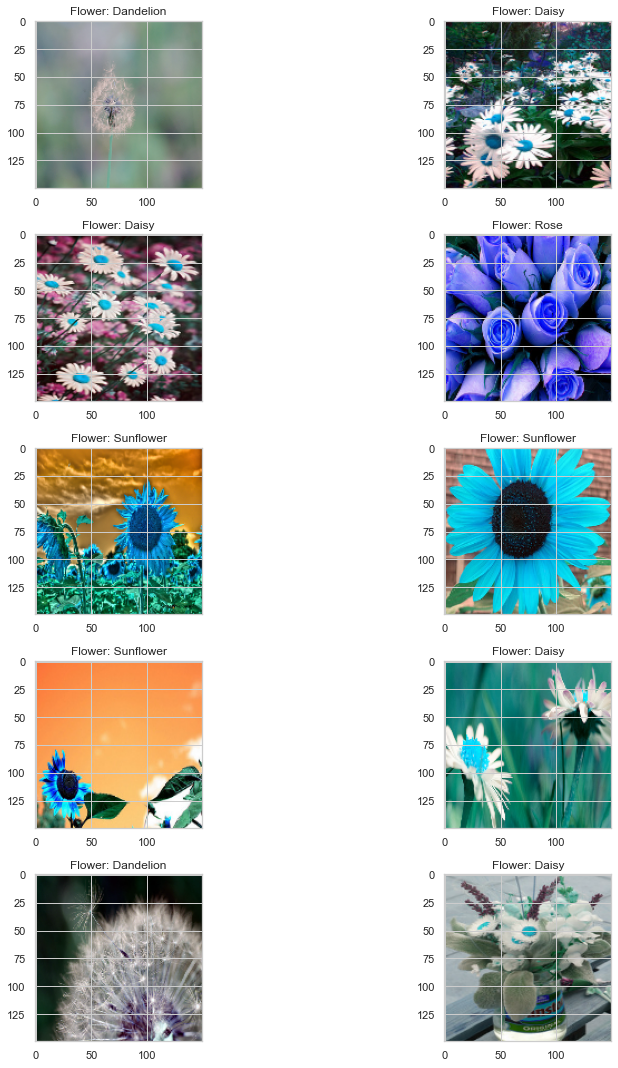

In [74]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()
        

## 2.3 ) Label Encoding the Y array (i.e. Daisy->0, Rose->1 etc...) & then One Hot Encoding

In [75]:
le=LabelEncoder()
Y=le.fit_transform(Z)
print(Y)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

[0 0 0 ... 2 2 2]


In [76]:
Y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

## 2.4 ) Splitting into Training and Validation Sets

In [77]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


## 2.5 ) Setting the Random Seeds

In [78]:
np.random.seed(42)
rn.seed(42)
#tf.set_random_seed(42)
tf.random.set_seed(42)

<a id="content3"></a>
## 3 ) Modelling

## 3.1 ) Building the ConvNet Model

In [79]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

## 3.2 ) Using a LR Annealer

In [80]:
batch_size=64
epochs=10

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

## 3.3 ) Data Augmentation to prevent Overfitting

In [81]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

## 3.4 ) Compiling the Keras Model & Summary

In [82]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [83]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 18, 18, 96)       

## 3.5 ) Fitting on the Training set and making predcitons on the Validation set

In [84]:
model.predict

<bound method Model.predict of <keras.engine.sequential.Sequential object at 0x000001178078A640>>

In [85]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
#History= model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/10
43/43 [==============================] - 52s 1s/step - loss: 1.3678 - accuracy: 0.3801 - val_loss: 1.1816 - val_accuracy: 0.5054
Epoch 2/10
43/43 [==============================] - 54s 1s/step - loss: 1.1086 - accuracy: 0.5534 - val_loss: 1.0845 - val_accuracy: 0.5817
Epoch 3/10
43/43 [==============================] - 54s 1s/step - loss: 0.9830 - accuracy: 0.6050 - val_loss: 0.9804 - val_accuracy: 0.6035
Epoch 4/10
43/43 [==============================] - 53s 1s/step - loss: 0.8678 - accuracy: 0.6508 - val_loss: 0.9378 - val_accuracy: 0.6416
Epoch 5/10
43/43 [==============================] - 52s 1s/step - loss: 0.7991 - accuracy: 0.6893 - val_loss: 0.8995 - val_accuracy: 0.6471
Epoch 6/10
43/43 [==============================] - 52s 1s/step - loss: 0.7061 - accuracy: 0.7286 - val_loss: 0.8937 - val_accuracy: 0.6688
Epoch 7/10
43/43 [==============================] - 53s 1s/step - loss: 0.6114 - accuracy: 0.7627 - val_loss: 0.9205 - val_accuracy: 0.6580
Epoch 8/10
43/43 [==

<a id="content4"></a>
## 4 ) Evaluating the Model Performance

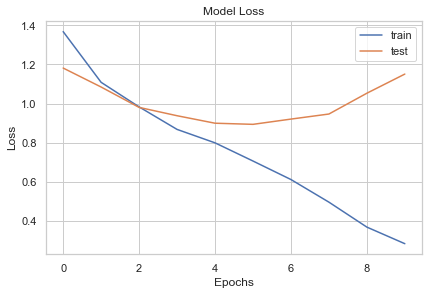

In [86]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

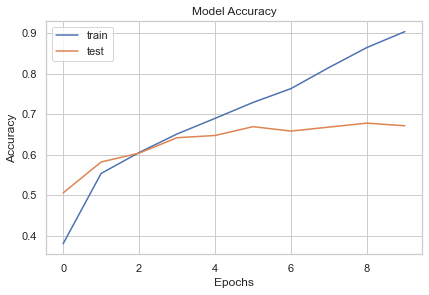

In [87]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()
